## Perform basic EDA

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

In [10]:
df = pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
df.head(11)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [13]:
df.tail(11)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13189,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3,5500
13190,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.00,7,16666
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [14]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [15]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 

In [16]:
# Define numerical columns for outlier detection
num_cols = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]
df_cleaned = df.copy()  # Create a copy for cleaning

# 1. Mean & Standard Deviation Method (Trimming)
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower, upper = mean - 3 * std, mean + 3 * std
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

# 2. Percentile Method (Capping at 1st and 99th percentile)
for col in num_cols:
    lower, upper = np.percentile(df[col], [1, 99])
    df_cleaned[col] = np.clip(df_cleaned[col], lower, upper)

# 3. IQR Method (Trimming outliers beyond Q1 - 1.5*IQR and Q3 + 1.5*IQR)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

# 4. Z-Score Method (Imputation using Median)
for col in num_cols:
    df_cleaned["z_score"] = np.abs(stats.zscore(df_cleaned[col]))
    median_val = df_cleaned[col].median()
    df_cleaned.loc[df_cleaned["z_score"] > 3, col] = median_val

# Remove temporary Z-score column
df_cleaned = df_cleaned.drop(columns=["z_score"])

# Summary of data size after outlier removal
outlier_removal_summary = {
    "Original Data Size": len(df),
    "Data Size after Cleaning": len(df_cleaned),
    "Rows Removed": len(df) - len(df_cleaned),
}

outlier_removal_summary


NameError: name 'stats' is not defined

## Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

IndexError: index 3 is out of bounds for axis 1 with size 3

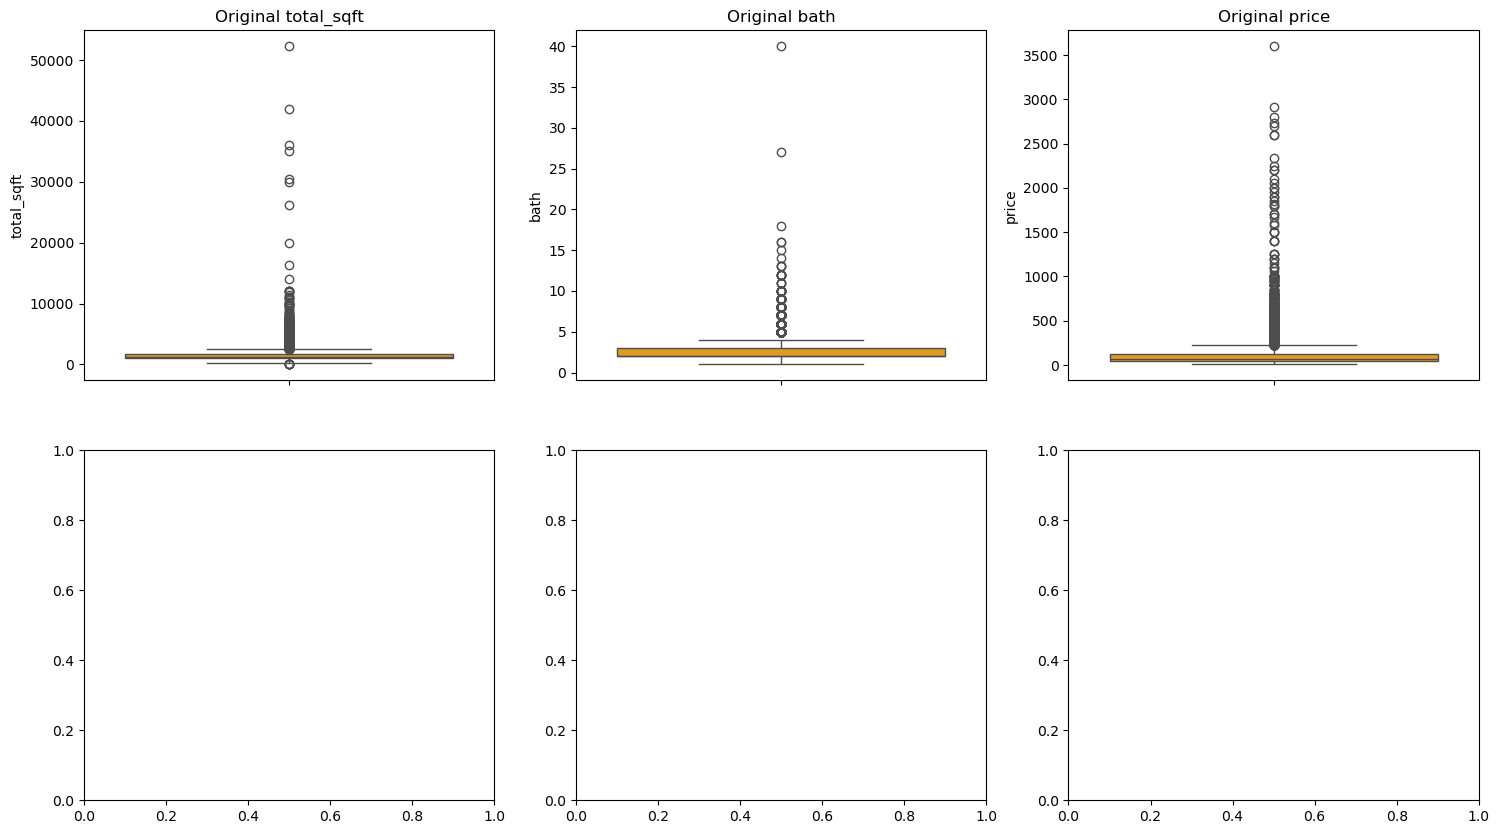

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Original Data Box Plot
for i, col in enumerate(["total_sqft", "bath", "price", "bhk", "price_per_sqft"]):
    sns.boxplot(y=df[col], ax=axes[0, i], color="orange")
    axes[0, i].set_title(f"Original {col}")

# Cleaned Data Box Plot (After Outlier Removal)
for i, col in enumerate(["total_sqft", "bath", "price", "bhk", "price_per_sqft"]):
    sns.boxplot(y=df_cleaned[col], ax=axes[1, i], color="lightgreen")
    axes[1, i].set_title(f"Cleaned {col}")

# Adjust layout
plt.tight_layout()
plt.show()




## Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

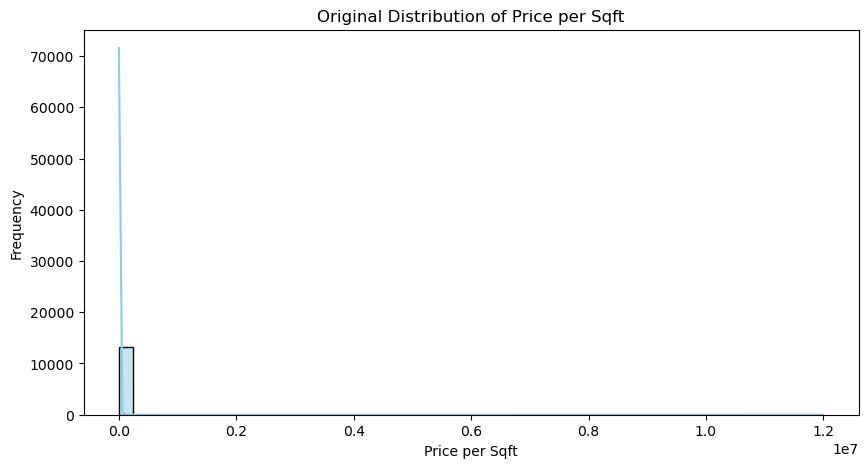

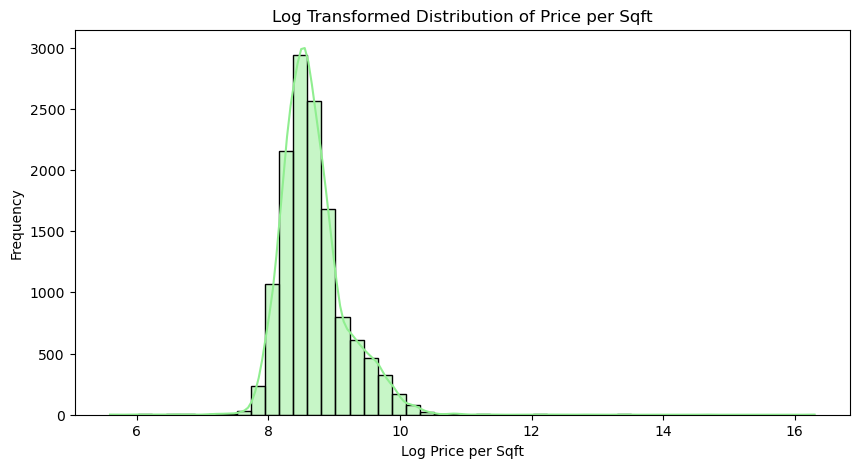

{'Original Skewness': 108.26875024325159,
 'Transformed Skewness': 1.4003259019533636,
 'Original Kurtosis': 12090.633538860382,
 'Transformed Kurtosis': 9.203000543610957}

In [18]:
# Extract 'price_per_sqft' column
price_per_sqft = df["price_per_sqft"]

# Compute skewness and kurtosis before transformation
original_skewness = skew(price_per_sqft)
original_kurtosis = kurtosis(price_per_sqft)

# Plot original distribution
plt.figure(figsize=(10, 5))
sns.histplot(price_per_sqft, bins=50, kde=True, color="skyblue")
plt.title("Original Distribution of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Apply log transformation to reduce skewness
df["log_price_per_sqft"] = np.log1p(price_per_sqft)

# Compute skewness and kurtosis after transformation
transformed_skewness = skew(df["log_price_per_sqft"])
transformed_kurtosis = kurtosis(df["log_price_per_sqft"])

# Plot transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["log_price_per_sqft"], bins=50, kde=True, color="lightgreen")
plt.title("Log Transformed Distribution of Price per Sqft")
plt.xlabel("Log Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Summary of Skewness and Kurtosis
skew_kurt_summary = {
    "Original Skewness": original_skewness,
    "Transformed Skewness": transformed_skewness,
    "Original Kurtosis": original_kurtosis,
    "Transformed Kurtosis": transformed_kurtosis,
}

skew_kurt_summary


## Check the correlation between all the numerical columns and plot heatmap

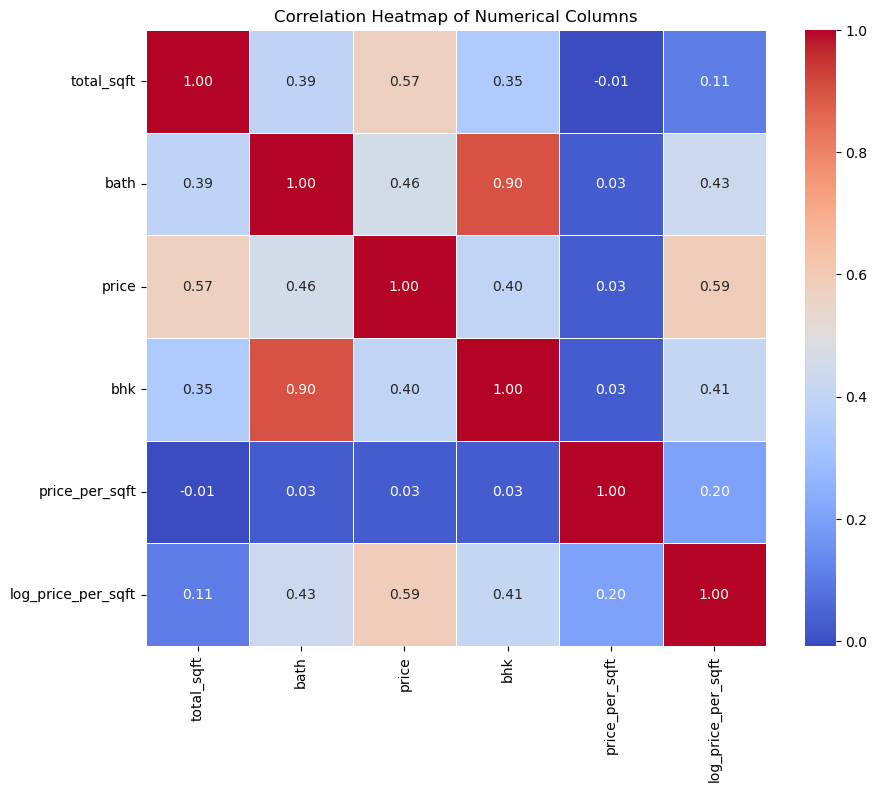

In [19]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

## Draw Scatter plot between the variables to check the correlation between them

   total_sqft  bath   price  bhk  price_per_sqft  log_price_per_sqft
0      1056.0   2.0   39.07    2            3699            8.216088
1      2600.0   5.0  120.00    4            4615            8.437284
2      1440.0   2.0   62.00    3            4305            8.367765
3      1521.0   3.0   95.00    3            6245            8.739697
4      1200.0   2.0   51.00    2            4250            8.354910


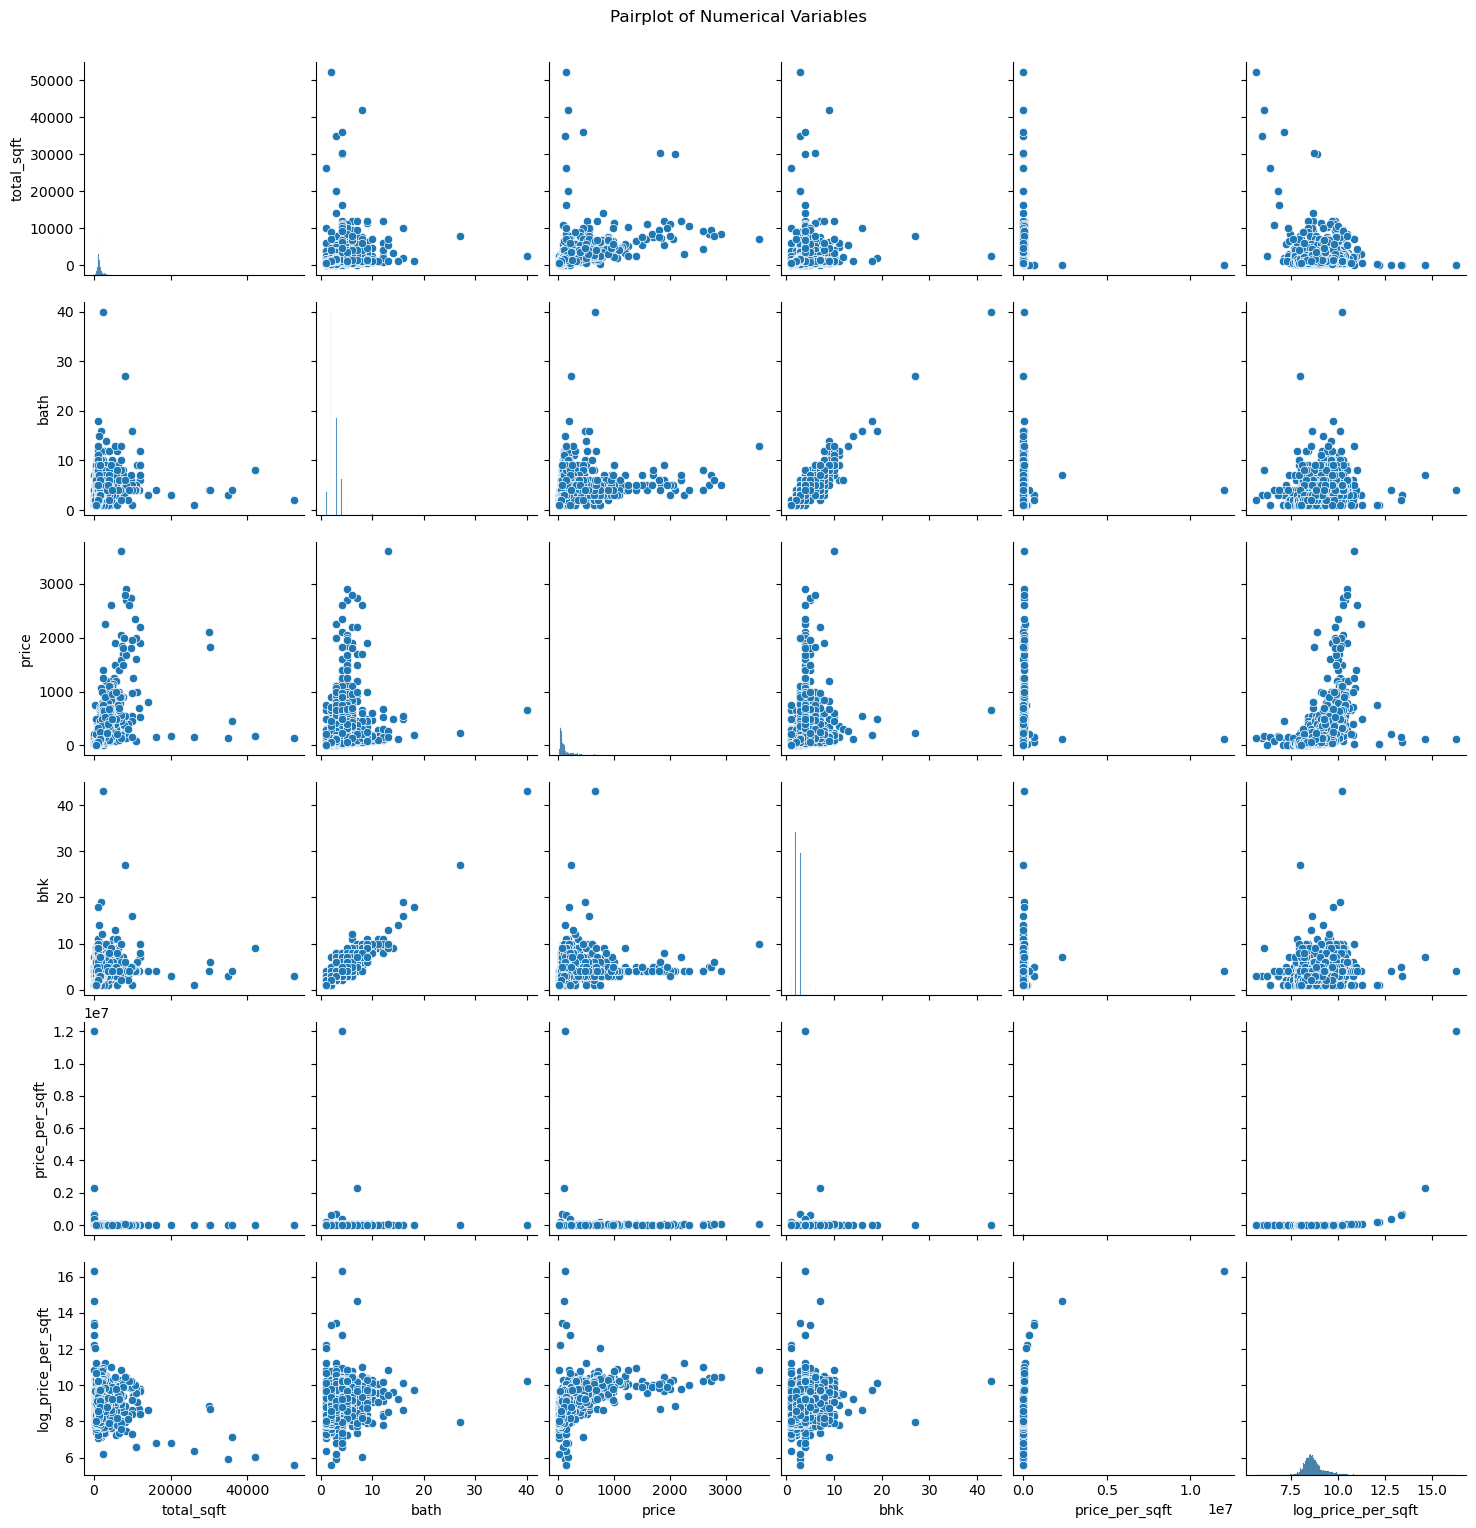

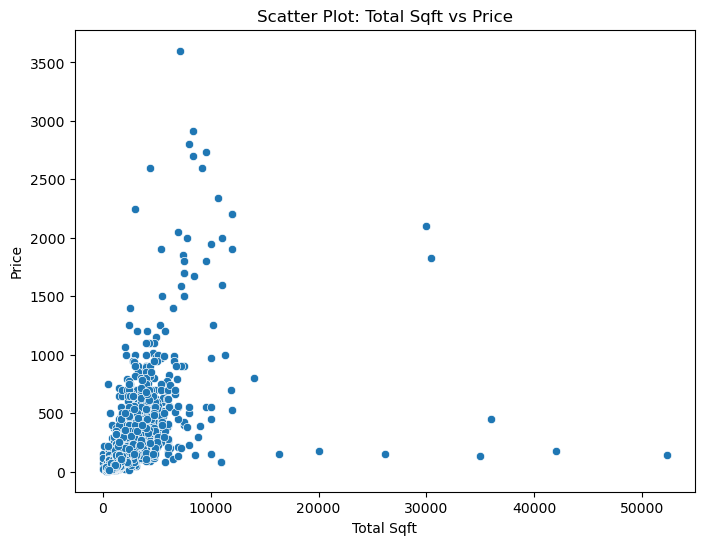

In [21]:
# Select numerical columns
print(numerical_columns.head())

# Pairplot for all numerical variables
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# Example: Scatter plot between 'total_sqft' and 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title("Scatter Plot: Total Sqft vs Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price', data=df)
plt.title("Scatter Plot: BHK vs Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price', data=df)
plt.title("Scatter Plot: Bath vs Price")
plt.xlabel("Bath")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_per_sqft', y='price', data=df)
plt.title("Scatter Plot: Price per Sqft vs Price")
plt.xlabel("Price per Sqft")
plt.ylabel("Price")
plt.show()
